In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
x_train = pd.read_csv('./Fashion-MNIST/trainData.csv')
y_train = pd.read_csv('./Fashion-MNIST/trainLabels.csv')
x_test = pd.read_csv('./Fashion-MNIST/testData.csv')
y_test = pd.read_csv('./Fashion-MNIST/testLabels.csv')
x_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [3]:
x_train.isna().any(axis=1).sum()

0

In [4]:
unique_classes = y_train.iloc[:,0].unique()

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Implementing LDA

In [5]:
height, width = x_train.shape
num_classes = len(unique_classes)

scatter_t = np.cov(x_train.T)*(height - 1)
scatter_w = 0
for i in range(num_classes):
    class_items = np.flatnonzero(y_train.iloc[:,0] == unique_classes[i])
    scatter_w = scatter_w + np.cov(x_train[class_items].T) * (len(class_items)-1)

scatter_b = scatter_t - scatter_w
eigen_values, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
print("eigen vectors shpe: ", eig_vectors.shape)
print("eigen values shape: ", eigen_values.shape)

eigen vectors shpe:  (784, 784)
eigen values shape:  (784,)


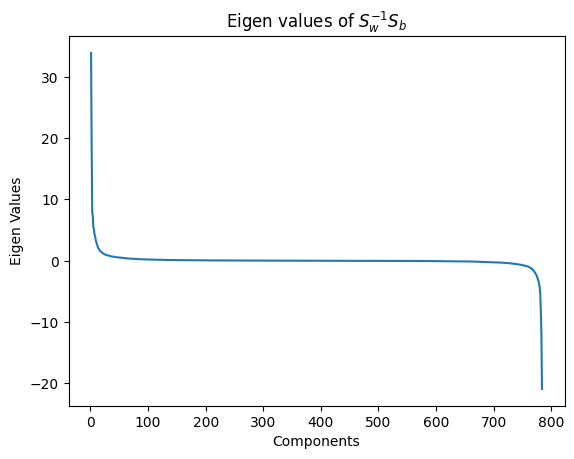

In [6]:
plt.plot(np.arange(1,eigen_values.shape[0]+1), eigen_values[::-1])
plt.xlabel('Components')
plt.ylabel('Eigen Values')
plt.title(r'Eigen values of $S_w^{-1}S_b$')
plt.show()

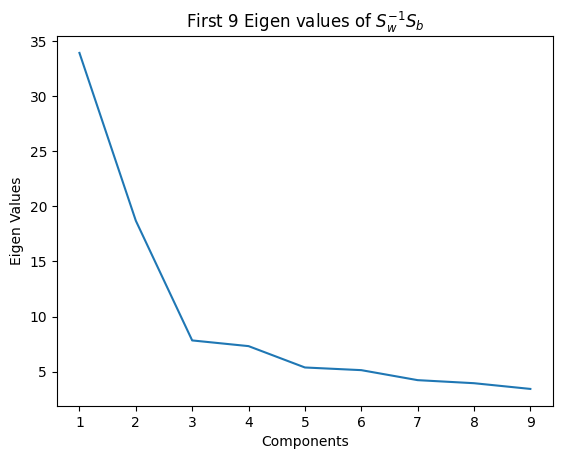

In [19]:
plt.plot(np.arange(1,10), list(eigen_values[::-1])[0:9])
plt.xlabel('Components')
plt.ylabel('Eigen Values')
plt.title(r'First 9 Eigen values of $S_w^{-1}S_b$')
plt.show()

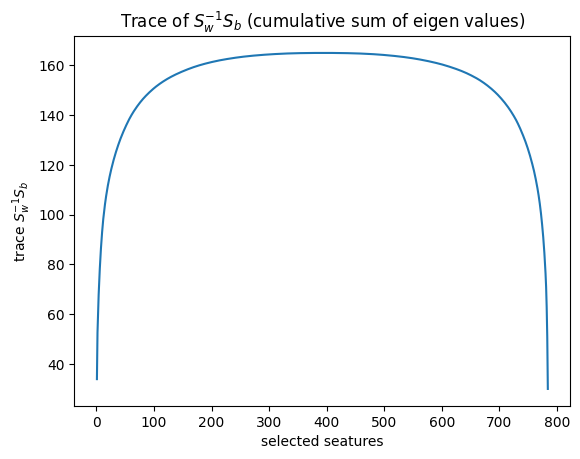

In [7]:
plt.plot(np.arange(1,eigen_values.shape[0]+1), np.cumsum(eigen_values[::-1]))
plt.xlabel('selected seatures')
plt.ylabel(r'trace $S_w^{-1}S_b$')
plt.title(r'Trace of $S_w^{-1}S_b$ (cumulative sum of eigen values)')
plt.show()

In [8]:
num_components = 9
x_train_lda = x_train.dot(eig_vectors[:,::-1][:,:num_components])
x_test_lda = x_test.dot(eig_vectors[:,::-1][:,:num_components])

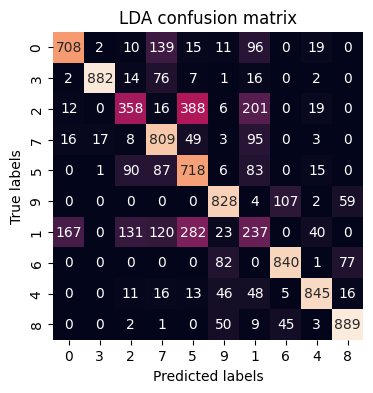

In [9]:
clf = GaussianNB()
clf.fit(x_train_lda, y_train)

pred_lda = clf.predict(x_test_lda)

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(y_test, pred_lda)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("LDA confusion matrix"); 
ax.xaxis.set_ticklabels(unique_classes); ax.yaxis.set_ticklabels(unique_classes);

In [10]:
print("CCR with LDA: ", precision_score(y_test, pred_lda, average='weighted'))

CCR with LDA:  0.7132924362562637


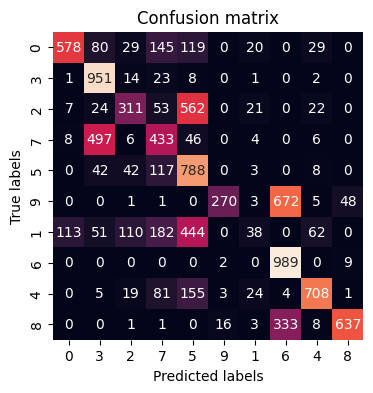

In [25]:
clf1 = GaussianNB()
clf1.fit(x_train, y_train)

pred = clf1.predict(x_test)

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("Confusion matrix"); 
ax.xaxis.set_ticklabels(unique_classes); ax.yaxis.set_ticklabels(unique_classes);

In [12]:
print("CCR without LDA: ", precision_score(y_test, pred, average='weighted'))

CCR without LDA:  0.6263507781626968


In [13]:
lda2 = LDA()
x_train_lda2= lda2.fit_transform(x_train, y_train.values.ravel())
x_test_lda2 = lda2.transform(x_test)

In [14]:
x_train_lda2.shape

(59999, 9)

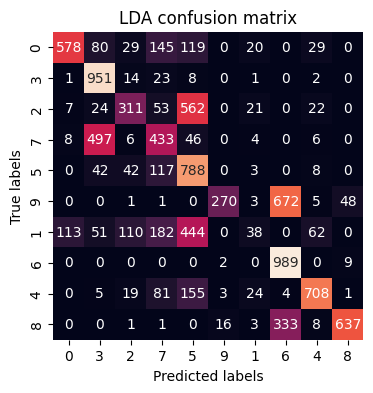

In [15]:
clf2 = GaussianNB()
clf2.fit(x_train_lda2, y_train)

pred2 = clf2.predict(x_test_lda2)

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title("LDA confusion matrix"); 
ax.xaxis.set_ticklabels(unique_classes); ax.yaxis.set_ticklabels(unique_classes);

In [16]:
print("CCR with sklearn LDA: ", precision_score(y_test, pred2, average='weighted'))

CCR with sklearn LDA:  0.8099820207799944
